<a href="https://colab.research.google.com/github/Eshwar-Naidus/task-1/blob/main/Task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- Task 4 (Refactored): K-Means Clustering ---
Dataset loaded successfully.
Preprocessing data...
Features selected and scaled.
Calculating WCSS (Inertia) for K=1 to 10...
Saved 'mall_elbow_plot.png'. Optimal K is 5.
Training final K-Means model with K=5...
Model training and cluster assignment complete.
Generating and saving the final cluster visualization...
Saved 'mall_clusters.png' to /content/mall_clusters.png

--- Task 4 (Refactored) Complete. ---


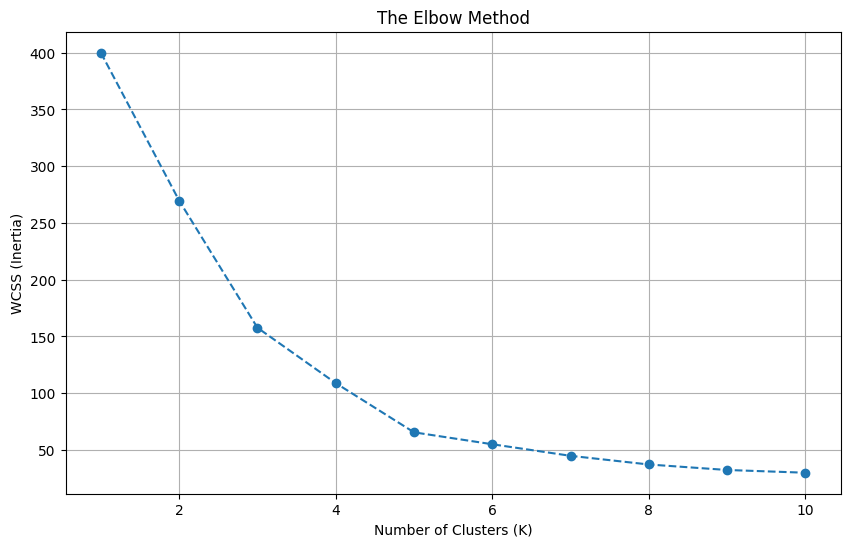

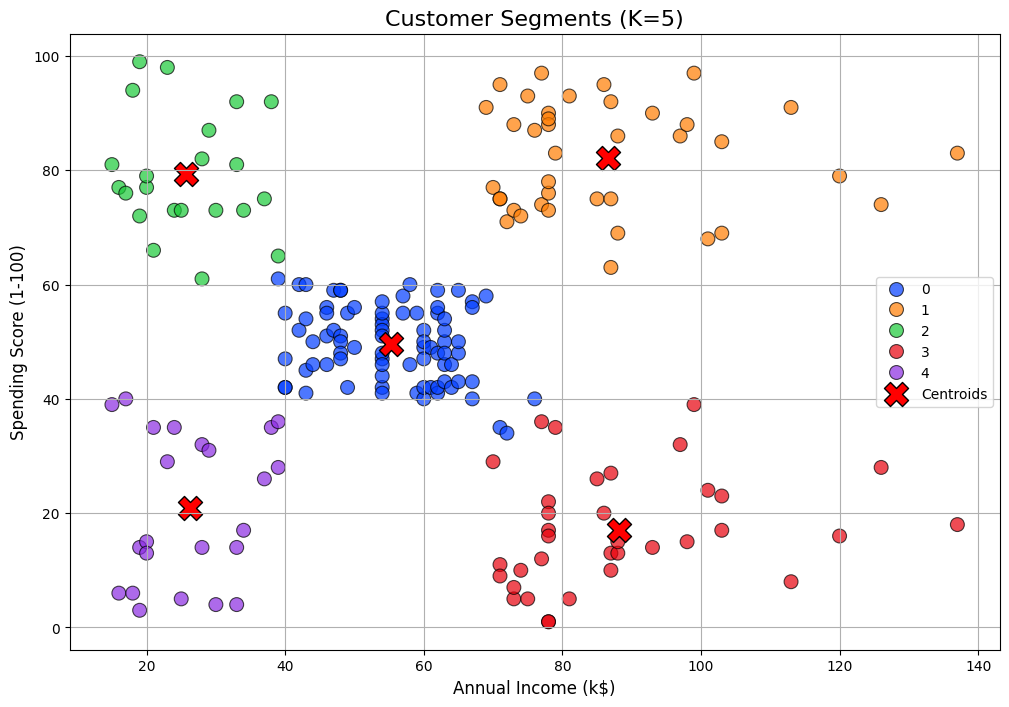

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import os

# --- Constants ---
# THIS IS THE FIXED, WORKING URL
DATASET_URL = "https://raw.githubusercontent.com/sharmaroshan/Clustering-of-Mall-Customers/master/Mall_Customers.csv"
OPTIMAL_K = 5
RANDOM_STATE = 42

def load_data(url):
    """
    Loads the dataset from the specified URL.
    """
    try:
        df = pd.read_csv(url)
        print("Dataset loaded successfully.")
        return df
    except Exception as e:
        print(f"Error loading dataset: {e}")
        return None

def preprocess_data(df):
    """
    Prepares the data for clustering:
    1. Renames columns for easier access.
    2. Selects the features for clustering.
    3. Scales the features using StandardScaler (crucial for K-Means).
    """
    print("Preprocessing data...")
    # Rename columns
    df_processed = df.rename(columns={
        'Annual Income (k$)': 'Annual_Income',
        'Spending Score (1-100)': 'Spending_Score'
    })

    # Select features
    X_features = df_processed[['Annual_Income', 'Spending_Score']]

    # Scale the features
    # K-Means is sensitive to feature scales, so this is a critical step.
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_features)

    print("Features selected and scaled.")
    # Return scaled data, the scaler object, and the processed DataFrame
    return X_scaled, scaler, df_processed

def find_optimal_k(X_scaled, max_k=10):
    """
    Uses the Elbow Method to find the optimal K and saves the plot.
    """
    print(f"Calculating WCSS (Inertia) for K=1 to {max_k}...")
    wcss = []  # Within-Cluster Sum of Squares
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, init='k-means++', random_state=RANDOM_STATE, n_init=10)
        kmeans.fit(X_scaled)
        wcss.append(kmeans.inertia_)

    # Plot the Elbow Method
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_k + 1), wcss, marker='o', linestyle='--')
    plt.title('The Elbow Method')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('WCSS (Inertia)')
    plt.grid(True)
    plt.savefig('mall_elbow_plot.png')
    print("Saved 'mall_elbow_plot.png'. Optimal K is 5.")

def train_kmeans(X_scaled, k):
    """
    Trains the final K-Means model with the optimal K.
    Returns cluster labels and scaled centroid coordinates.
    """
    print(f"Training final K-Means model with K={k}...")
    kmeans_model = KMeans(n_clusters=k, init='k-means++', random_state=RANDOM_STATE, n_init=10)

    # Fit the model and predict the clusters
    y_kmeans = kmeans_model.fit_predict(X_scaled)

    # Get the coordinates of the cluster centers (centroids)
    centroids_scaled = kmeans_model.cluster_centers_

    print("Model training and cluster assignment complete.")
    return y_kmeans, centroids_scaled

def plot_clusters(df_plot, y_kmeans, centroids_scaled, scaler):
    """
    Visualizes the final clusters and their centroids on the original data scale.
    """
    print("Generating and saving the final cluster visualization...")
    df_plot['Cluster'] = y_kmeans

    # We must inverse_transform the centroids to plot them
    # on the original (un-scaled) feature axes.
    centroids_original = scaler.inverse_transform(centroids_scaled)

    plt.figure(figsize=(12, 8))
    sns.scatterplot(
        data=df_plot,
        x='Annual_Income',
        y='Spending_Score',
        hue='Cluster',
        palette=sns.color_palette('bright', n_colors=OPTIMAL_K),
        s=100,  # size of markers
        alpha=0.7,
        edgecolor='k'
    )

    # Plot the un-scaled centroids
    plt.scatter(
        x=centroids_original[:, 0],
        y=centroids_original[:, 1],
        s=300,  # size
        c='red',
        marker='X',
        label='Centroids',
        edgecolor='black'
    )

    plt.title(f'Customer Segments (K={OPTIMAL_K})', fontsize=16)
    plt.xlabel('Annual Income (k$)', fontsize=12)
    plt.ylabel('Spending Score (1-100)', fontsize=12)
    plt.legend()
    plt.grid(True)
    plt.savefig('mall_clusters.png')
    print(f"Saved 'mall_clusters.png' to {os.path.abspath('mall_clusters.png')}")

def main():
    """
    Main function to orchestrate the entire clustering task.
    """
    print("--- Task 4 (Refactored): K-Means Clustering ---")

    df_original = load_data(DATASET_URL)
    if df_original is None:
        return

    # Preprocess data (scale features)
    X_scaled, scaler, df_plot = preprocess_data(df_original)

    # Find optimal K and plot elbow graph
    find_optimal_k(X_scaled)

    # Train final model
    y_kmeans, centroids_scaled = train_kmeans(X_scaled, OPTIMAL_K)

    # Plot final clusters
    plot_clusters(df_plot, y_kmeans, centroids_scaled, scaler)

    print("\n--- Task 4 (Refactored) Complete. ---")


if __name__ == "__main__":
    main()